In [18]:
import pandas as pd
import numpy as np
import palettable
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

from scripts import figures

from scripts import aesthetics
aesthetics.activate_paper_rcParams()

bold_10 = palettable.cartocolors.qualitative.Bold_10.mpl_colors

## Supplementary Figure S8

In [14]:
rural_distances = pd.read_csv('ref/data/rural-distances.csv')
adi_related_data = pd.read_csv('ref/data/hpsa-mua-rural-adi-nci.csv')

Text(-0.1, 1, 'b')

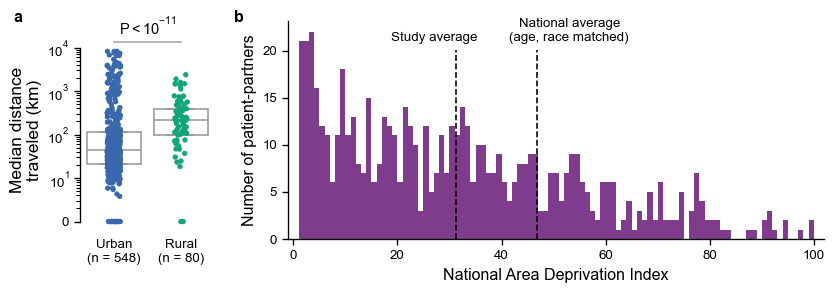

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3), gridspec_kw = {'width_ratios': [2, 8], 'wspace': 0.22})

# plot distance for rural
ax = axes[0]
order = [False, True]
sns.stripplot(x = 'Rural', y = 'Log10_distance', data = rural_distances, 
              order = order, ax = ax, s = 4, palette = {False: bold_10[2], True: bold_10[1]})
sns.boxplot(x = 'Rural', y = 'Log10_distance', data = rural_distances, 
              order = order, color = 'white', ax = ax, fliersize = 0, whis = 0)

# plot p values
n_data = rural_distances[~(rural_distances['Rural'])].dropna()
y_data = rural_distances[(rural_distances['Rural'])].dropna()

value, p = scipy.stats.mannwhitneyu(n_data['Log10_distance'], y_data['Log10_distance'], alternative = 'two-sided')
ax.text(x = 0.5, y = 1.03, s = "$\mathregular{P<10^{-11}}$", 
           ha = 'center', va = 'top', fontsize = 11, transform = ax.transAxes)

sns.despine(ax = ax, bottom = True)
ax.set_ylim([-0.4, 4.6])

ax.set_xlabel('')
ax.set_ylabel('Median distance\ntraveled (km)')

counts = adi_related_data['RURAL'].value_counts()
ax.set_xticklabels(['Urban\n(n = {})'.format(counts.loc[0]), 
                    'Rural\n(n = {})'.format(counts.loc[1])])

# ax.minorticks_off()
ax.yaxis.set_ticks([np.log10(x) for p in range(0,4) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(figures.format_func))
ax.tick_params(axis = 'x', length = 0, pad = 0)
ax.spines['left'].set_bounds([0, 4])
ax.plot([0, 1], [4.12, 4.12], color = 'darkgrey');

ax = axes[1]
ax.hist(adi_related_data['ADI_NATRNK'], bins = np.arange(1, 101));
ax.set_xlabel('National Area Deprivation Index', fontsize = 12)
ax.set_ylabel('Number of patient-partners', fontsize = 12)
ax.axvline(x = 46.77, 
           color = 'black', linestyle = 'dashed', ymax = 0.87)
ax.text(x = 53, y = 21, 
        s = 'National average\n(age, race matched)', ha = 'center', fontsize = 10)
ax.axvline(x = 31.28, 
           color = 'black', linestyle = 'dashed', ymax = 0.87)
ax.text(x = 27, y = 21, 
        s = 'Study average', ha = 'center', fontsize = 10)
ax.set_xlim([-1, 102])
sns.despine(ax = ax)
axes[0].text(s = 'a', fontweight = 'bold', x = -0.5, y = 1, transform = axes[0].transAxes)
axes[1].text(s = 'b', fontweight = 'bold', x = -0.10, y = 1, transform = axes[1].transAxes)
# fig.savefig('images/area-deprivation-index.png', dpi = 300, bbox_inches = 'tight')
# fig.savefig('images/rural-distance-national-adi.pdf', bbox_inches = 'tight')


## Supplementary Figure S8, S10

These figures cannot be reproduced here because they contain information about germline pathogenic mutations on a non-summary level.